In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

import schemdraw
import schemdraw.flow as flow

In [23]:
patient_id = "C1P08_20210810_1"
clustering_results = pd.read_csv(f'clustering_results/{patient_id}_ecm.csv')
clustering_results

,start,end,non-paretic_std,paretic_std,0,1,2,3,4,5,6,7
0,2021-07-30 20:00:07.512469529,2021-07-30 20:05:08.754674435,0.237100,0.105886,4.662937e-15,0.000095,4.664262e-07,3.866274e-08,9.995360e-01,3.675150e-04,5.738868e-07,5.114187e-08
1,2021-07-30 20:05:08.774562836,2021-07-30 20:10:09.882629871,0.185309,0.115084,1.280087e-13,0.910540,6.807841e-05,2.445440e-05,6.840549e-03,8.181527e-02,3.792462e-04,3.328869e-04
2,2021-07-30 20:10:09.902511120,2021-07-30 20:15:11.001961946,0.145736,0.054008,5.655476e-13,0.011520,1.144265e-02,3.722164e-03,1.018072e-03,4.456465e-05,9.716918e-01,5.611075e-04
3,2021-07-30 20:15:11.021849155,2021-07-30 20:20:12.220299244,0.132589,0.078040,9.439116e-13,0.110207,2.319083e-02,7.247597e-01,1.278904e-03,1.045037e-04,1.346143e-01,5.844526e-03
4,2021-07-30 20:20:12.240186214,2021-07-30 20:25:13.378952742,0.167425,0.094302,2.153833e-14,0.031631,4.232823e-05,3.853222e-05,2.815040e-04,1.134769e-04,5.665410e-03,9.622273e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
974,2021-08-05 15:16:36.639656544,2021-08-05 15:21:37.517231941,0.068223,0.053842,5.329071e-15,0.000009,9.999754e-01,1.508111e-05,4.008363e-07,1.182861e-08,3.493732e-07,1.206680e-08
975,2021-08-05 15:21:37.537093401,2021-08-05 15:26:38.214397430,0.059463,0.001275,6.961098e-14,0.000015,9.999788e-01,3.296778e-06,2.306888e-06,4.067353e-08,8.411334e-07,2.093867e-08
976,2021-08-05 15:26:38.234250784,2021-08-05 15:31:38.880528927,0.025735,0.001667,1.168510e-12,0.000112,9.998523e-01,1.554008e-05,1.662068e-05,2.825107e-07,3.369942e-06,1.069369e-07
977,2021-08-05 15:31:38.900377750,2021-08-05 15:36:39.417139053,0.113355,0.002372,4.141354e-12,0.002655,9.953103e-01,6.115729e-04,6.618397e-04,1.119182e-05,7.415706e-04,8.915068e-06


In [24]:
# select columns 'non-paretic_std', 'paretic_std'
features = clustering_results[['non-paretic_std', 'paretic_std']].values
mass = clustering_results.iloc[:, 4:].values

number_clusters = int(np.log2(mass.shape[1]))

F = [[int(i) for i in f"{int(c):0b}"] for c in clustering_results.columns[4:]]
[f.reverse() for f in F]
F = np.array([f + [0]*(number_clusters - len(f)) for f in F])

focal_sets = [" \\cup ".join(["\\omega_{" + str(i+1) + "}" for i in range(len(f)) if f[i] == 1]) for f in F]
focal_sets[0] = "\emptyset"
mass_focal_sets = ['$m_{'+focal_sets[i]+'}$' for i in range(len(focal_sets))]
focal_sets = ['$'+f+'$' for f in focal_sets]

In [25]:
cmap = plt.get_cmap('Pastel1')

cluster_base_colors = [np.array(cmap(0)), np.array(cmap(1)), np.array(cmap(2)), np.array(cmap(4))]

focal_colors = []

for f in F:
    color = np.array([0., 0., 0., 0.])
    for i in range(len(f)):
        if f[i] == 1:
            color += cluster_base_colors[i+1]
    color = color/np.sum(f)

    cardinality_indication_color = np.array(cmap(7)) #np.array([0., 0., 0., 1.])

    color = color + (cardinality_indication_color - color) * (np.sum(f)-1)/(number_clusters-1)

    focal_colors.append(color)
focal_colors[0] = cluster_base_colors[0]

/var/folders/qn/sypqqw3101v1k6_70wqyd99h0000gn/T/ipykernel_70875/3096895718.py:12: RuntimeWarning: invalid value encountered in divide
  color = color/np.sum(f)


In [26]:
colors = []
for point in range(len(features)):
    color = np.sum([focal_colors[i] * mass[point, i] for i in range(len(focal_sets))], axis=0)
    color = np.clip(color, 0, 1)
    color = color[:3]
    colors.append(color)

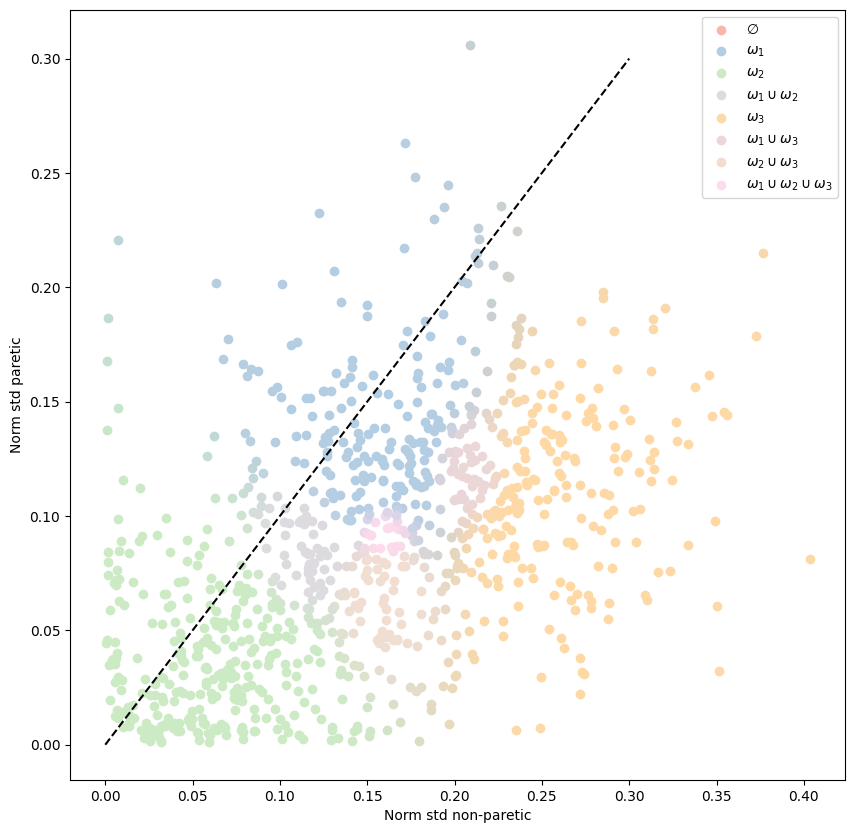

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in range(len(features)):
    ax.scatter(features[i, 0], features[i, 1], color=colors[i])

for i in range(len(focal_sets)):
    ax.scatter([], [], color=focal_colors[i], label=focal_sets[i])

# make dashed lines where stds are equal
ax.plot([0, 0.3], [0, 0.3], 'k--')

ax.legend(loc='upper right')

ax.set_xlabel('Norm std non-paretic')
ax.set_ylabel('Norm std paretic')

plt.show()

In [28]:
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

In [29]:
pl = np.matmul(mass, F)

metacluster_cardinality = np.sum(F, axis=1)
bel = mass[:, metacluster_cardinality == 1]

most_plausible_cluster = np.argmax(bel, axis=1)

## Decision Tree Explaining

In [30]:
%load_ext autoreload
%autoreload 2

from lib import decision_tree_imperfect

def create_edt(features_tree_generator = lambda x: x, edt_pars={}, plot_tree_pars={}):
    classifier = decision_tree_imperfect.EDT(**edt_pars)

    features_tree = features_tree_generator(features)

    y = mass.copy()

    classifier.fit(features_tree, y)

    diagram = classifier.plot_tree(**plot_tree_pars)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    features_xy = features_tree_generator(np.column_stack((X.ravel(), Y.ravel())))
    Z = classifier.predict(features_xy).reshape(X.shape)

    k = lambda j: [i for i in range(len(F)) if F[i, j] == 1 and np.sum(F[i]) == 1][0]

    colors_clusters = [focal_colors[k(j)][:3] for j in range(number_clusters)]

    ax[2].contourf(X, Y, Z, cmap=plt.cm.colors.ListedColormap(colors_clusters), extend='both')

    Z_mass = classifier.predict(features_xy, return_bba=True)[1].reshape(X.shape[0], X.shape[1], -1)

    Z_color = np.zeros((X.shape[0], X.shape[1], 3))
    for k in range(len(F)):
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z_color[i, j] += Z_mass[i, j, k] * focal_colors[k][:3]

    ax[1].scatter(X, Y, c=Z_color.reshape(-1, 3))

    Z_mass = classifier.predict(features_xy, return_bba=True)[1].reshape(X.shape[0], X.shape[1], -1)

    Z_color = np.zeros((X.shape[0], X.shape[1], 3))
    for k in range(len(F)):
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z_color[i, j] += Z_mass[i, j, k] * focal_colors[k][:3]

    ax[0].scatter(X, Y, c=Z_color.reshape(-1, 3))

    # scatter the data
    for i in range(len(features)):
        ax[0].scatter(features[i, 0], features[i, 1], color=colors[i], edgecolors='black')

    plt.show()

    return diagram

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


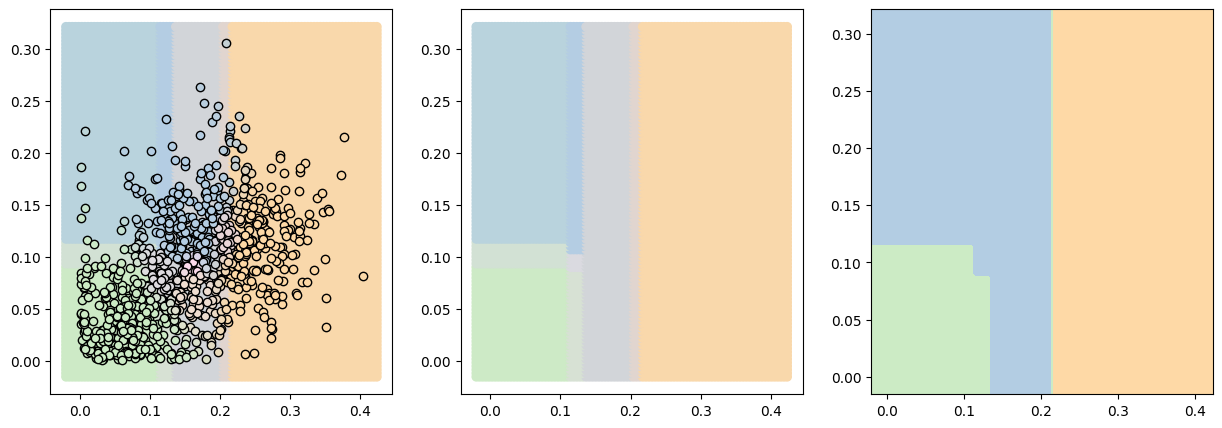

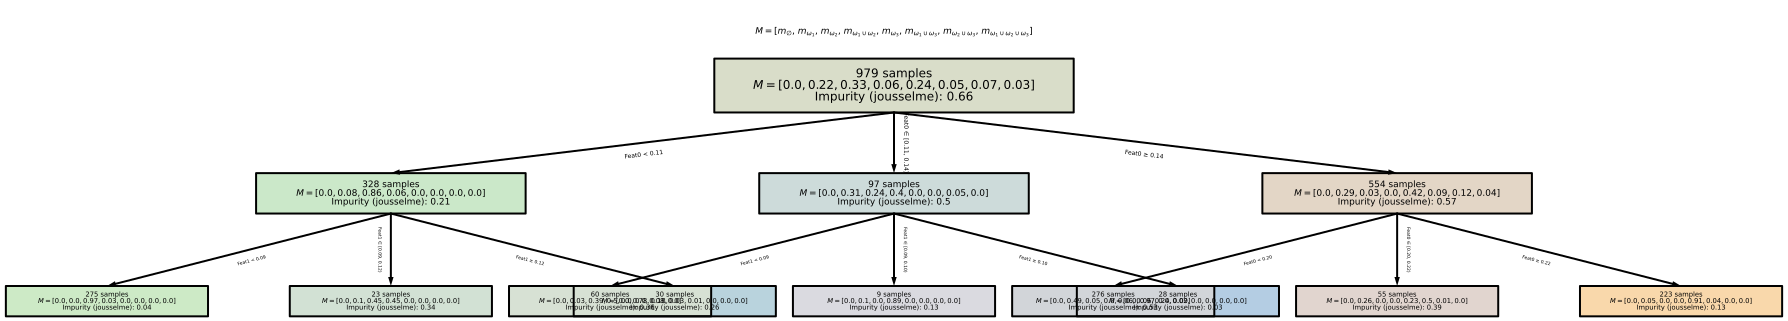

In [31]:
create_edt(
    edt_pars={
        'max_depth': 3,
        'cautiousness_tolerance': 0.1,
        'criterion': 'jousselme'
    },
    plot_tree_pars={
        'class_names' : mass_focal_sets,
        'focal_colors' : np.array(focal_colors),
    }
)

In [32]:
centroids = []
for i in range(mass.shape[1]):
    centroid = np.zeros(features.shape[1])
    for point in range(len(features)):
        centroid += features[point] * mass[point, i]
    centroid /= np.sum(mass[:, i])

    if np.sum(F[i]) == 1:
        centroids.append(centroid)

# get vectors linking centroids
vectors = []
for i in range(len(centroids)):
    for j in range(i+1, len(centroids)):
        vectors.append(centroids[j] - centroids[i])

# for each vector get an orthonormal basis
orthonormal_bases = []
for vector in vectors:
    vector = vector / np.linalg.norm(vector)
    dimension = len(vector)
    orthonormal_basis = np.zeros((dimension, dimension))
    orthonormal_basis[:, 0] = vector
    orthonormal_basis[:, 1] = np.random.randn(dimension)
    orthonormal_basis[:, 1] -= np.dot(orthonormal_basis[:, 1], orthonormal_basis[:, 0]) * orthonormal_basis[:, 0]
    orthonormal_basis[:, 1] /= np.linalg.norm(orthonormal_basis[:, 1])
    orthonormal_bases.append(orthonormal_basis)

orthonormal_bases = np.array(orthonormal_bases)

def project_bases(features):
    # project features on the orthonormal basis
    projected_features = np.zeros((features.shape[0], features.shape[1]*orthonormal_bases.shape[0]))

    for i in range(orthonormal_bases.shape[0]):
        projected_features[:, i*features.shape[1]:(i+1)*features.shape[1]] = np.matmul(features, orthonormal_bases[i])

    projected_features = np.reshape(projected_features, (projected_features.shape[0], -1))

    return projected_features

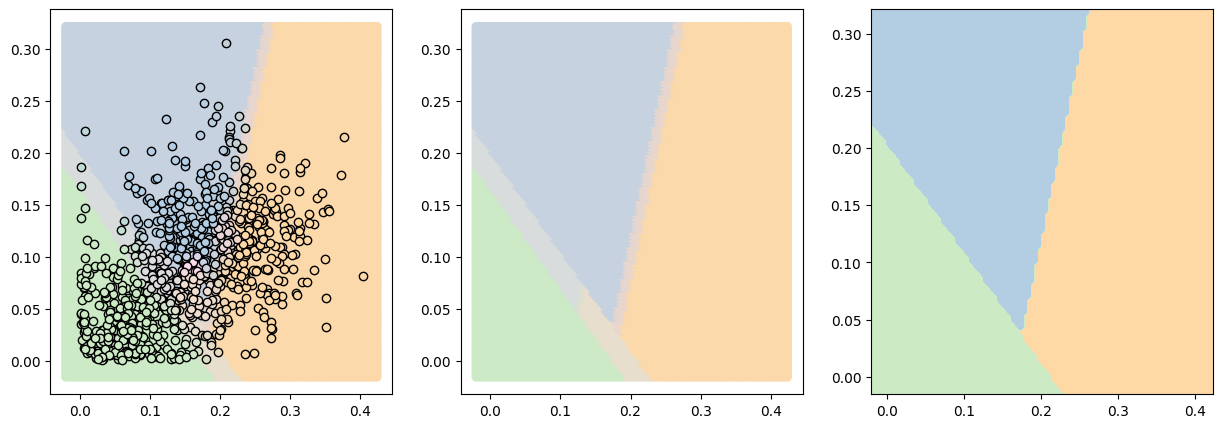

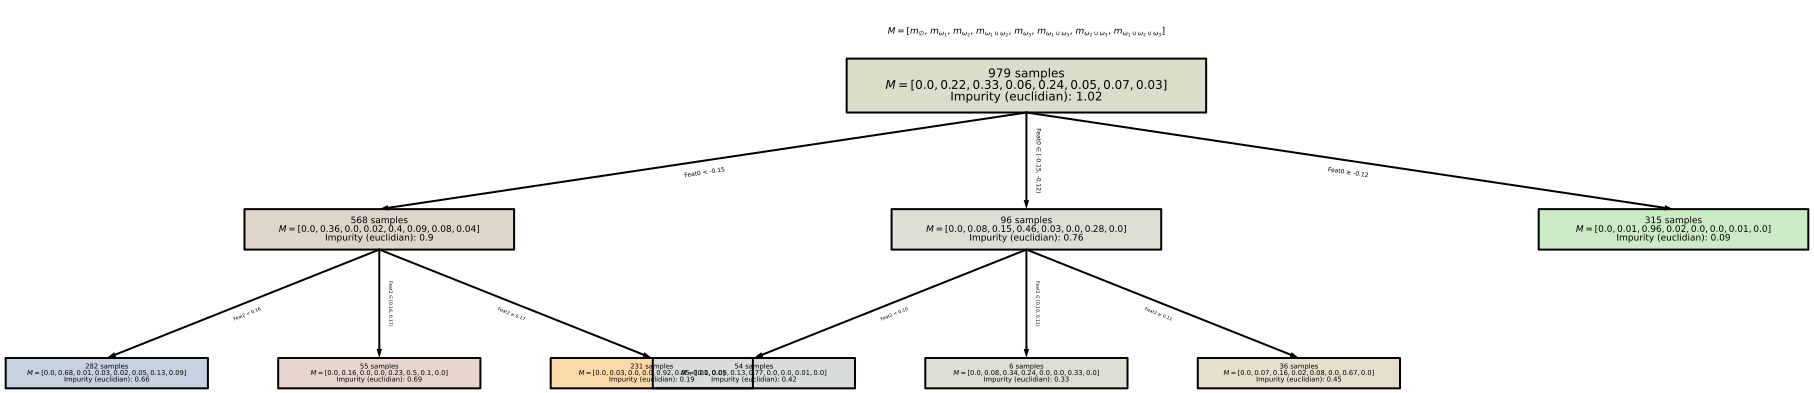

In [38]:
create_edt(
    features_tree_generator = project_bases,
    edt_pars={
        'criterion_treshold': 0.2,
        'cautiousness_tolerance': 0.1,
        'criterion': 'euclidian',
        'max_depth': 3
    },
    plot_tree_pars={
        'class_names' : mass_focal_sets,
        'focal_colors' : np.array(focal_colors),
        'x_spacing' : 8,
        'y_spacing' : 4,
        'x_reduction' : 0.01,
    }
)